<a href="https://colab.research.google.com/github/chamodi08jaya/Generative-Adversarial-Networks-GANs-Specialization/blob/main/ACGPN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For inferencing ACGPN!

ACGPN repo: https://github.com/switchablenorms/DeepFashion_Try_On

This notebook is hard coded for inferencing one image at a time.

Notebook by [Levin Dabhi](https://levindabhi.github.io/)

# ACGPN

In [1]:
!git clone https://github.com/levindabhi/ACGPN.git
%cd ACGPN

fatal: destination path 'ACGPN' already exists and is not an empty directory.
/content/ACGPN


In [2]:
!pip install ninja

In [3]:
import gdown
import numpy as np
from PIL import Image
import IPython
import gdown
import os
import sys

from predict_pose import generate_pose_keypoints

In [4]:
'''
gdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)
%cd Data_preprocessing
!unzip data
%cd ..
'''

"\ngdown.download('https://drive.google.com/uc?id=1tE7hcVFm8Td8kRh5iYRBSDFdvZIkbUIR', 'Data_preprocessing/data.zip', quiet=False)\n%cd Data_preprocessing\n!unzip data\n%cd ..\n"

In [5]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

mkdir: cannot create directory ‘Data_preprocessing/test_color’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_colormask’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_edge’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_img’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_label’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_mask’: File exists
mkdir: cannot create directory ‘Data_preprocessing/test_pose’: File exists
mkdir: cannot create directory ‘inputs’: File exists
mkdir: cannot create directory ‘inputs/img’: File exists
mkdir: cannot create directory ‘inputs/cloth’: File exists


In [6]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/ACGPN/pose/pose_iter_440000.caffemodel
100% 209M/209M [00:01<00:00, 155MB/s]
/content/ACGPN


In [7]:
!git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
!git clone https://github.com/levindabhi/U-2-Net.git

fatal: destination path 'Self-Correction-Human-Parsing-for-ACGPN' already exists and is not an empty directory.
fatal: destination path 'U-2-Net' already exists and is not an empty directory.


In [8]:
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/ACGPN/lip_final.pth
100%|██████████| 267M/267M [00:02<00:00, 96.3MB/s]


'lip_final.pth'

In [9]:
%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
mkdir: cannot create directory ‘saved_models/u2net’: File exists
mkdir: cannot create directory ‘saved_models/u2netp’: File exists
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 73.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:01<00:00, 137MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


In [10]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

mkdir: cannot create directory ‘checkpoints’: File exists


Downloading...
From: https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
To: /content/ACGPN/checkpoints/ACGPN_checkpoints.zip
100%|██████████| 524M/524M [00:03<00:00, 163MB/s]


/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
replace label2city/latest_net_G.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: label2city/latest_net_G.pth  
replace label2city/latest_net_G1.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: label2city/latest_net_G1.pth  
replace label2city/latest_net_G2.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: label2city/latest_net_G2.pth  
replace label2city/latest_net_U.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: label2city/latest_net_U.pth  
replace label2city/opt.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: label2city/opt.txt      
/content/ACGPN


### Please upload your cloth image below

In [11]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving blue.jpg to blue.jpg
/content/ACGPN/inputs
/content/ACGPN


### Please upload your person image below

In [12]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving model.png to model.png
/content/ACGPN/inputs
/content/ACGPN


In [13]:
sorted(os.listdir('inputs/cloth'))

['blue.jpg']

In [14]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png


In [15]:
sorted(os.listdir('inputs/img'))

['model.png']

In [16]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.013208627700805664s
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100% 1/1 [00:00<00:00,  3.58it/s]
Parsing generated in 5.878743648529053s
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 11.387221813201904s


In [17]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [18]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

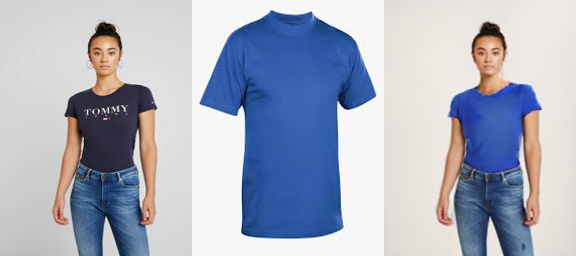

In [19]:
output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

### Check results in 'results' folder!

**Deleting all images**

In [20]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*

In [21]:
!rm -rf results/*

In [22]:
%cd /content/

/content
